In [43]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
from datetime import datetime

In [3]:
date_parser=lambda x:datetime.strptime(x, "%d-%m-%Y")
data=pd.read_csv(r"C:\Users\vishal\Downloads\SuperStore_Sales_Dataset.csv",parse_dates=["Order Date"], date_parser=date_parser, encoding='unicode_escape')

In [4]:
#it is showing how many rows and column we have in this dataset#
data.shape

(5901, 23)

In [5]:
#with this function i am checking first 10 rows#
data.head(10)

,ï»¿Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode,ind1,ind2
0,4918,CA-2019-160304,2019-01-01,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.940,1,28.2668,NaN,Online,NaN,NaN
1,4919,CA-2019-160304,2019-01-02,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.940,3,38.2668,NaN,Online,NaN,NaN
2,4920,CA-2019-160304,2019-01-02,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Technology,Phones,GE 30522EE2,231.980,2,67.2742,NaN,Cards,NaN,NaN
3,3074,CA-2019-125206,2019-01-03,05-01-2019,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.460,2,28.6150,NaN,Online,NaN,NaN
4,8604,US-2019-116365,2019-01-03,08-01-2019,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,Technology,Accessories,ImationÂ Clip USBÂ flash driveÂ - 8 GB,30.080,2,-5.2640,NaN,Online,NaN,NaN
5,8605,US-2019-116365,2019-01-03,08-01-2019,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,Technology,Accessories,WD My Passport Ultra 1TB Portable External Har...,165.600,3,-6.2100,NaN,Online,NaN,NaN
6,8606,US-2019-116365,2019-01-03,08-01-2019,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,Technology,Phones,AT&T 17929 Lendline Telephone,180.960,5,13.5720,NaN,Cards,NaN,NaN
7,9494,CA-2019-105207,2019-01-03,08-01-2019,Standard Class,BO-11350,Bill Overfelt,Corporate,United States,Broken Arrow,...,Furniture,Tables,Hon Practical Foundations 30 x 60 Training Tab...,1592.850,7,350.4270,NaN,COD,NaN,NaN
8,9495,CA-2019-105207,2019-01-03,08-01-2019,Standard Class,BO-11350,Bill Overfelt,Corporate,United States,Broken Arrow,...,Office Supplies,Binders,Storex Dura Pro Binders,11.880,2,5.3460,NaN,COD,NaN,NaN
9,2898,US-2019-164630,2019-01-04,09-01-2019,Standard Class,EB-13975,Erica Bern,Corporate,United States,Charlotte,...,Technology,Copiers,Hewlett Packard 310 Color Digital Copier,959.968,4,119.9960,NaN,Online,NaN,NaN


In [6]:
# here checking if any column value have null values#
data.isnull().sum()

ï»¿Row ID+O6G3A1:R6       0
Order ID                  0
Order Date                0
Ship Date                 0
Ship Mode                 0
Customer ID               0
Customer Name             0
Segment                   0
Country                   0
City                      0
State                     0
Region                    0
Product ID                0
Category                  0
Sub-Category              0
Product Name              0
Sales                     0
Quantity                  0
Profit                    0
Returns                5614
Payment Mode              0
ind1                   5901
ind2                   5901
dtype: int64

In [7]:
# now i am getting summary if any data type is missing#
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ï»¿Row ID+O6G3A1:R6  5901 non-null   int64         
 1   Order ID             5901 non-null   object        
 2   Order Date           5901 non-null   datetime64[ns]
 3   Ship Date            5901 non-null   object        
 4   Ship Mode            5901 non-null   object        
 5   Customer ID          5901 non-null   object        
 6   Customer Name        5901 non-null   object        
 7   Segment              5901 non-null   object        
 8   Country              5901 non-null   object        
 9   City                 5901 non-null   object        
 10  State                5901 non-null   object        
 11  Region               5901 non-null   object        
 12  Product ID           5901 non-null   object        
 13  Category             5901 non-nul

In [8]:
#here i am looking at descriptive statististic of dataset#
data.describe()

,ï»¿Row ID+O6G3A1:R6,Sales,Quantity,Profit,Returns,ind1,ind2
count,5901.000000,5901.000000,5901.000000,5901.000000,287.0,0.0,0.0
mean,5022.422471,265.345589,3.781901,29.700408,1.0,NaN,NaN
std,2877.977184,474.260645,2.212917,259.589138,0.0,NaN,NaN
min,1.000000,0.836000,1.000000,-6599.978000,1.0,NaN,NaN
25%,2486.000000,71.976000,2.000000,1.795500,1.0,NaN,NaN
50%,5091.000000,128.648000,3.000000,8.502500,1.0,NaN,NaN
75%,7456.000000,265.170000,5.000000,28.615000,1.0,NaN,NaN
max,9994.000000,9099.930000,14.000000,8399.976000,1.0,NaN,NaN


In [9]:
#here i know that ind1 and ind2 column has no values so i am going to drop this column#
data.drop(['ind1','ind2'], axis=1, inplace=True)

In [10]:
data = data.rename(columns={'Order Date': 'Order_Date','Order Id': 'Order_ID','Ship Date': 'Ship_Date','Customer ID': 'Customer_ID','Customer Name': 'Customer_Name','Product ID': 'Product_ID','Product Name':'Product_Name','Payment Mode': 'Payment_Mode'})

In [11]:
 #Exploratory Data analysis#
 #First i will do Overall Sales Analysis#
#Q. What is the total sales revenue?

Total_Revenue= data["Sales"].sum()
print("Total Sales Revenue; $", Total_Revenue)


Total Sales Revenue; $ 1565804.3232


In [12]:
#Q2. Sales reveue varies over time#


print(data.columns)


Index(['ï»¿Row ID+O6G3A1:R6', 'Order ID', 'Order_Date', 'Ship_Date',
       'Ship Mode', 'Customer_ID', 'Customer_Name', 'Segment', 'Country',
       'City', 'State', 'Region', 'Product_ID', 'Category', 'Sub-Category',
       'Product_Name', 'Sales', 'Quantity', 'Profit', 'Returns',
       'Payment_Mode'],
      dtype='object')


In [13]:
#Top seling products by quantity and revenue#


top_products_quantity = data.groupby('Product_Name')['Quantity'].sum().sort_values(ascending=False)

# Group by product and calculate the total revenue generated
top_products_revenue = data.groupby('Product_Name')['Profit'].sum().sort_values(ascending=False)

# Print the top-selling products in terms of quantity and revenue
print("Top-selling products by quantity:")
print(top_products_quantity.head())

print("\nTop-selling products by revenue:")
print(top_products_revenue.head())

Top-selling products by quantity:
Product_Name
Staples                               124
Easy-staple paper                      89
Staple envelope                        73
Staples in misc. colors                60
Chromcraft Round Conference Tables     59
Name: Quantity, dtype: int64

Top-selling products by revenue:
Product_Name
Canon imageCLASS 2200 Advanced Copier                        25199.9280
Hewlett Packard LaserJet 3310 Copier                          6407.8932
3D Systems Cube Printer, 2nd Generation, Magenta              3717.9714
HP Designjet T520 Inkjet Large Format Printer - 24" Color     2799.9840
GBC DocuBind TL300 Electric Binding System                    2753.7593
Name: Profit, dtype: float64


In [44]:
#Top selling Products by category and sub-category

# Group by category and calculate the total revenue generated
top_categories_revenue = data.groupby('Category')['Profit'].sum().sort_values(ascending=False)

# Group by sub-category and calculate the total revenue generated
top_subcategories_revenue = data.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)

# Print the top-selling categories and sub-categories by revenue
print("Top-selling categories by revenue:")
print(top_categories_revenue.head())

print("\nTop-selling sub-categories by revenue:")
print(top_subcategories_revenue.head())


Top-selling categories by revenue:
Category
Technology         90458.2486
Office Supplies    74797.2461
Furniture          10006.6112
Name: Profit, dtype: float64

Top-selling sub-categories by revenue:
Sub-Category
Copiers        42774.5828
Accessories    25336.6455
Phones         22308.9179
Paper          21112.3779
Binders        17885.3759
Name: Profit, dtype: float64


In [47]:
#Pie chart to know the sales by category

sales_by_category = data.groupby('Category')['Sales'].sum().reset_index()
category_pie= px.pie(sales_by_category, 
             values='Sales', 
             names='Category', 
             hole=0.5, 
             color_discrete_sequence=px.colors.qualitative.Pastel)
category_pie.update_traces(textposition='inside', textinfo='percent+label')
category_pie.update_layout(title_text='Sales Analysis by Category', title_font=dict(size=24))

category_pie.show()

In [53]:
#Sales by Sub-Category bar chart

sales_by_subcategory=data.groupby('Sub-Category')['Sales'].sum().reset_index()

sub_category_bar=px.bar(sales_by_subcategory,
                       x='Sub-Category', 
                       y='Sales', 
                       title='Sales Analysis by Sub-Category')
sub_category_bar.show()

In [41]:
# Please run this if you facing problem to see charts  
data.reset_index(inplace=True)

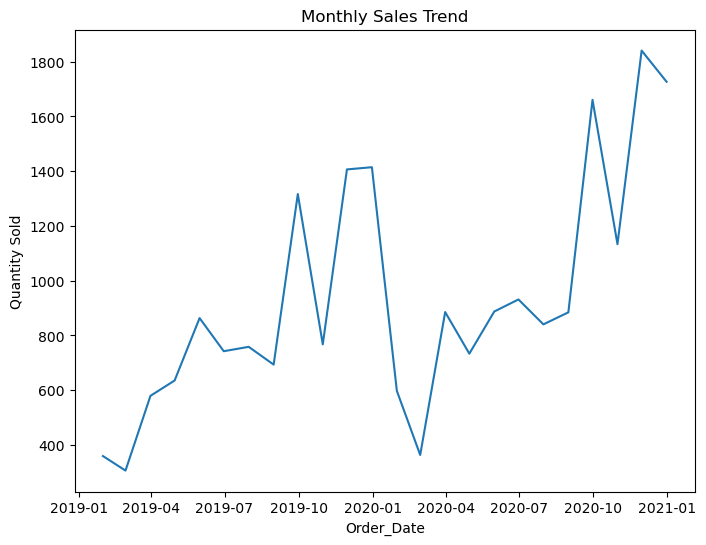

In [42]:
data['Order_Date'] = pd.to_datetime(data['Order_Date'])
data.set_index('Order_Date', inplace=True)

# Resample the data to monthly frequency and calculate the total quantities sold
monthly_sales = data['Quantity'].resample('M').sum()

# Plot the monthly sales trend
plt.figure(figsize=(8, 6))
plt.plot(monthly_sales)
plt.title('Monthly Sales Trend')
plt.xlabel('Order_Date')
plt.ylabel('Quantity Sold')
plt.show()

In [54]:
#top selling segment by quantity and revenue#
top_products_quantity = data.groupby('Segment')['Quantity'].sum().sort_values(ascending=False)

# Group by Segment and calculate the total revenue generated
top_products_revenue = data.groupby('Segment')['Profit'].sum().sort_values(ascending=False)

# Print the top-selling segments in terms of quantity and revenue
print("Top-selling products segment by quantity:")
print(top_products_quantity.head())

print("\nTop-selling products by revenue:")
print(top_products_revenue.head())

Top-selling products segment by quantity:
Segment
Consumer       11199
Corporate       6865
Home Office     4253
Name: Quantity, dtype: int64

Top-selling products by revenue:
Segment
Consumer       81338.5875
Corporate      57805.7991
Home Office    36117.7193
Name: Profit, dtype: float64


In [66]:


# Calculate sales and profit by segment
sales_profit_by_segment = data.groupby('Segment').sum().reset_index()

# Define color palette
color_palette = ['#FFA500', '#008000']

# Create a bar chart
segment_bar= go.Figure([
    go.Bar(x=sales_profit_by_segment['Segment'], y=sales_profit_by_segment['Sales'], name='Sales', marker_color=color_palette[0]),
    go.Bar(x=sales_profit_by_segment['Segment'], y=sales_profit_by_segment['Profit'], name='Profit', marker_color=color_palette[1])
])

# Update layout
segment_bar.update_layout(title='Sales and Profit Analysis by Customer Segment', xaxis_title='Customer Segment', yaxis_title='Amount')

# Show the chart
segment_bar.show()

In [29]:
#product return rate and return cost

return_rate = (data['Returns'].sum() / data['Profit'].sum()) * 100
return_cost = data['Returns'].sum()
print("Return rate: ", return_rate)
print("Return cost: ", return_cost)

Return rate:  0.163754736670661
Return cost:  287.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Order_Date           5901 non-null   datetime64[ns]
 1   index                5901 non-null   int64         
 2   ï»¿Row ID+O6G3A1:R6  5901 non-null   int64         
 3   Order ID             5901 non-null   object        
 4   Ship_Date            5901 non-null   object        
 5   Ship Mode            5901 non-null   object        
 6   Customer_ID          5901 non-null   object        
 7   Customer_Name        5901 non-null   object        
 8   Segment              5901 non-null   object        
 9   Country              5901 non-null   object        
 10  City                 5901 non-null   object        
 11  State                5901 non-null   object        
 12  Region               5901 non-null   object        
 13  Product_ID           5901 non-nul

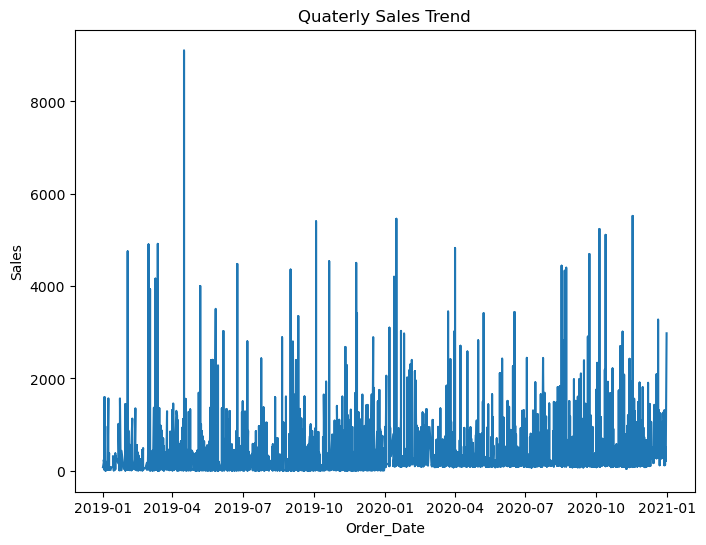

In [35]:
# Exploring the data to understand its characteristics and identify any trends or patterns.
data.head()  # View the first few rows of the data
data.info()  # Check the data types and missing values
data.describe()  # Get summary statistics of the data

# Visualize the sales data to identify any patterns, seasonality, or trends.
plt.figure(figsize=(8, 6))
plt.plot(data['Order_Date'], data['Sales'])
plt.xlabel('Order_Date')
plt.ylabel('Sales')
plt.title('Quaterly Sales Trend')
plt.show()